# Trabalho 3

##### Aluno: Leodécio Braz
##### Ra: 230219

In [1]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# nome e caminho das imagens
name_images = [('bitmap','./imagens_morfologia/bitmap.pbm')]

path = name_images[0]

#leitura da imagem
original = cv2.imread(path[1],0)
#Inverte os pixels da imagem
original_inv = cv2.bitwise_not(original)


#declaração dos kernels
kernel_1 = np.ones((1,100),np.uint8)
kernel_2 = np.ones((200,1),np.uint8)
kernel_3 = np.ones((1,30),np.uint8)
kernel_4 = np.ones((1,5),np.uint8)

In [3]:
# Função para salvar as imagens no formato PBM
def save_pbm(path,image):
    cv2.imwrite(path,image,(cv2.IMWRITE_PXM_BINARY, 0))

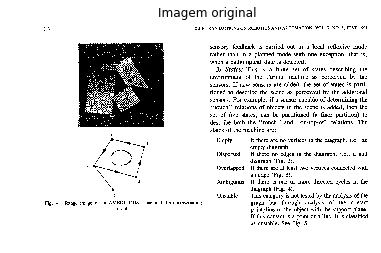

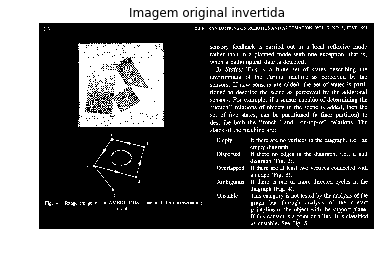

In [4]:
#Visualização da imagem original e a inversa
plt.axis('off')
plt.title("Imagem original")
plt.imshow(original,'gray')
plt.show()

plt.axis('off')
plt.title("Imagem original invertida")
plt.imshow(original_inv,'gray')
plt.show()

### (1) e (2)

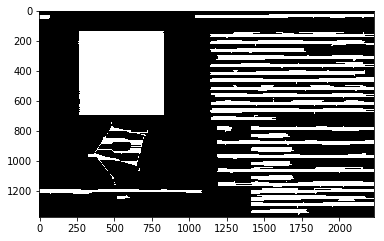

In [5]:
# (1)
dilation_1 = cv2.dilate(original_inv,kernel_1,iterations = 1)
#plt.imshow(dilation_1,'gray')
#plt.show()

# (2)
erosion_d1 = cv2.erode(dilation_1,kernel_1,iterations = 1)

plt.imshow(erosion_d1,'gray')
plt.show()

### (3) e (4)

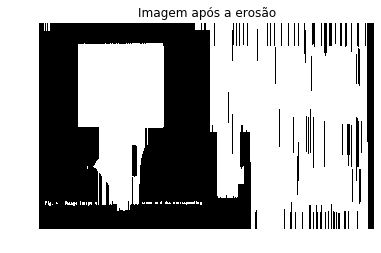

In [6]:
# (3)
dilation_2 = cv2.dilate(original_inv,kernel_2,iterations = 1)
#plt.imshow(dilation_2,'gray')
#plt.show()

# (4)
erosion_d2 = cv2.erode(dilation_2,kernel_2,iterations = 1)

plt.axis('off')
plt.title('Imagem após a erosão')
plt.imshow(erosion_d2,'gray')
plt.show()

### (5)

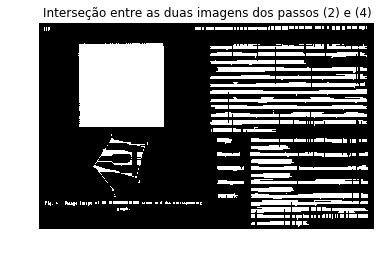

In [7]:
intersecao = cv2.bitwise_and(erosion_d1, erosion_d2)

plt.axis('off')
plt.title('Interseção entre as duas imagens dos passos (2) e (4)')
plt.imshow(intersecao,'gray')
plt.show()

### (6)

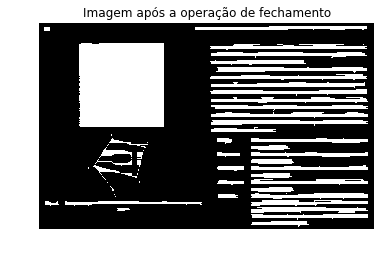

In [8]:
fechamento = cv2.morphologyEx(intersecao, cv2.MORPH_CLOSE, kernel_3)

plt.axis('off')
plt.title('Imagem após a operação de fechamento')
plt.imshow(fechamento,'gray')
plt.show()

### (7)

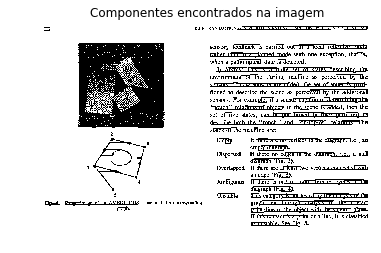

In [9]:
#Função para encontrar componentes na imagem
image, contours, hier = cv2.findContours(fechamento, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#lê a imagem para desenhar os contornos sobre a mesma
img_temp = cv2.imread(path[1],0)

#desenha os contornos na imagem
cv2.drawContours(img_temp, contours, -1, 0, 2)

plt.axis('off')
plt.title('Componentes encontrados na imagem')
plt.imshow(img_temp,cmap='gray')
plt.show()

### (8)

#### funções auxiliares

In [10]:
#função para verificar a quantidade transições
## de branco para preto na horizontal e vertical
## e retorna divisão pela quantidade de pixels preto 
def transitions(img,num_black):
    count_verti = 0
    count_hor = 0
    if(num_black > 0):
        for x in range(0,img.shape[0]-1):
            for y in range(0,img.shape[1]-1):
                if img[x][y] > 0 and img[x][y+1] == 0:
                    count_verti = count_verti+1
                if img[x][y] > 0 and img[x+1][y] == 0:
                    count_hor = count_hor +1
        return (count_verti+count_hor)/num_black
    else:
        return 0

In [11]:
# rate_a é razão entre o número de pixels pretos 
## e o número total de pixels (altura × largura) 
rate_a = []

# rate_b é razão entre o número de transições verticais 
## e horizontais branco para preto e o número total de pixels pretos
rate_b = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    img_ = img_temp[y:y+h,x:x+w]
    num_black = np.sum(img_ == 0)
    
    #calcula o rate_a
    ra = num_black/(w*h)
    rate_a.append(ra)     
    #calcula o rate_b
    rb = transitions(img_,num_black)
    rate_b.append(rb)

rate_a = np.array(rate_a)
rate_b = np.array(rate_b)

#média e desvio padrão do rates A e B
media_a = rate_a.mean()
desvio_a = rate_a.std()
media_b = rate_b.mean()
desvio_b = rate_b.std()

print("A)")
print("Média rate_A: {}".format(media_a))
print("Desvio Padrão rate_A: {}\n".format(desvio_a))

print("B)")
print("Média rate_B: {}".format(media_b))
print("Desvio Padrão rate_B: {}".format(desvio_b))

A)
Média rate_A: 0.5913697070497768
Desvio Padrão rate_A: 0.25283462555917763

B)
Média rate_B: 0.18787932315075997
Desvio Padrão rate_B: 0.09556402730144643


###  (9)

In [12]:
print("REGRA de Texto:")
print("|média_a-2*média_b| <= valor_A <= média_a")

REGRA de Texto:
|média_a-2*média_b| <= valor_A <= média_a


In [13]:
count_texto = 0
contador = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    if(rate_a[contador] >= abs(media_a-2*media_b)
       and rate_a[contador] <= media_a):
        count_texto = count_texto+1
    contador = contador+1
contador_linha = count_texto
print("Contagem linhas de texto = ", str(contador_linha))

Contagem linhas de texto =  36


### (10)

##### ----- retângulo envolvendo palavras ----------

In [14]:
#Lê uma nova imagem
img = cv2.imread(path[1],0)

#Inverte os pixels da imagem
img_inv = cv2.bitwise_not(img)

#Realiza 3 iterações de dilatação na imagem
dilate_img = cv2.dilate(img_inv,kernel_4,iterations = 3)
#Realiza 3 iterações de erosão no resultado anterior
erode_img = cv2.erode(dilate_img, kernel_4,iterations = 3)

#Inverte novamente os pixels da imagem
de_image = erode_img

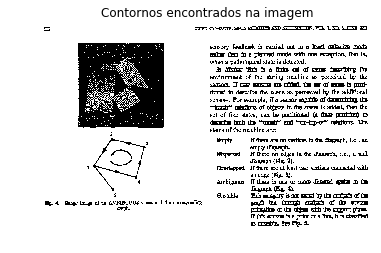

In [15]:
#Encontra os componentes conexos na imagem
image, contours, hier = cv2.findContours(de_image, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

#lê a imagem para desenhar os contornos sobre a mesma
new_temp = cv2.imread(path[1],0)

#desenha os contornos na imagem
cv2.drawContours(new_temp, contours, -1, 0, 2)

plt.axis('off')
plt.title('Contornos encontrados na imagem')
plt.imshow(new_temp,cmap='gray')
plt.show()

In [16]:
# mesmas razões descritos no passo (8)
rate_a_palavras = []
rate_b_palavras = []
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    #calcula os rates A e B
    img_ = new_temp[y:y+h,x:x+w]
    num_black = np.sum(img_ == 0)
    ra = num_black/(w*h)
    #calcula o rate_b
    rb = transitions(img_,num_black)
    #if(ra > 0.0):
    rate_a_palavras.append(ra)
    rate_b_palavras.append(rb)
        
rate_a_palavras = np.array(rate_a_palavras)
rate_b_palavras = np.array(rate_b_palavras)

#média e desvio padrão do rates A e B
media_a_palavras = rate_a_palavras.mean()
desvio_a_palavras = rate_a_palavras.std()
media_b_palavras = rate_b_palavras.mean()
desvio_b_palavras = rate_b_palavras.std()


print("A)")
print("Média rate_A: {}".format(media_a_palavras))
print("Desvio Padrão rate_A: {}\n".format(desvio_a_palavras))

print("B)")
print("Média rate_B: {}".format(media_b_palavras))
print("Desvio Padrão rate_B: {}".format(desvio_b_palavras))

A)
Média rate_A: 0.758211219904355
Desvio Padrão rate_A: 0.21512477118046178

B)
Média rate_B: 0.12049468741341843
Desvio Padrão rate_B: 0.09515917083815595


In [17]:
print("Regra de palavra:")
print("|(1/2)*média_a-2*desvio_a| <= valor_A <= (1/2)*média_a+(1.7)*desvio_a AND\n"+
      "valor_b >= média_b")

Regra de palavra:
|(1/2)*média_a-2*desvio_a| <= valor_A <= (1/2)*média_a+(1.7)*desvio_a AND
valor_b >= média_b


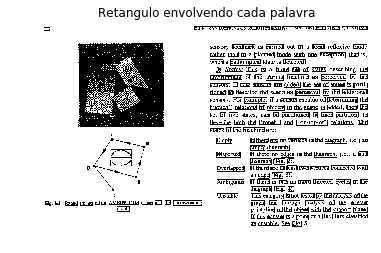

In [18]:
#Contador de palavras
count_palavras = 0
contador = 0
for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    
    if(rate_a_palavras[contador] >= abs((1/2)*media_a_palavras-desvio_a_palavras) 
       and rate_a_palavras[contador] <= (1/2)*media_a_palavras+(1.7)*desvio_a_palavras
       and rate_b_palavras[contador]>= media_b_palavras):
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
        count_palavras = count_palavras+1
    contador = contador+1    

plt.axis('off')
plt.title('Retangulo envolvendo cada palavra')
plt.imshow(img,cmap='gray')
plt.show()

save_pbm('./output/'+path[0]+'_cont_palavras.pbm',img)

In [19]:
print("Qtd Linhas de texto = {}".format(contador_linha))
print("Qtd de palavras = ", str(count_palavras))

Qtd Linhas de texto = 36
Qtd de palavras =  301
